In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas.plotting import lag_plot,autocorrelation_plot
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=86a70326542fab94fcd9657615072dcd43fd16a1fac1adab1f3ab8a6196eba1a
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
data=yf.download(tickers="TSLA", start="2019-01-01", end="2019-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500


In [ ]:
data.shape
data.sort_index(inplace=True)

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

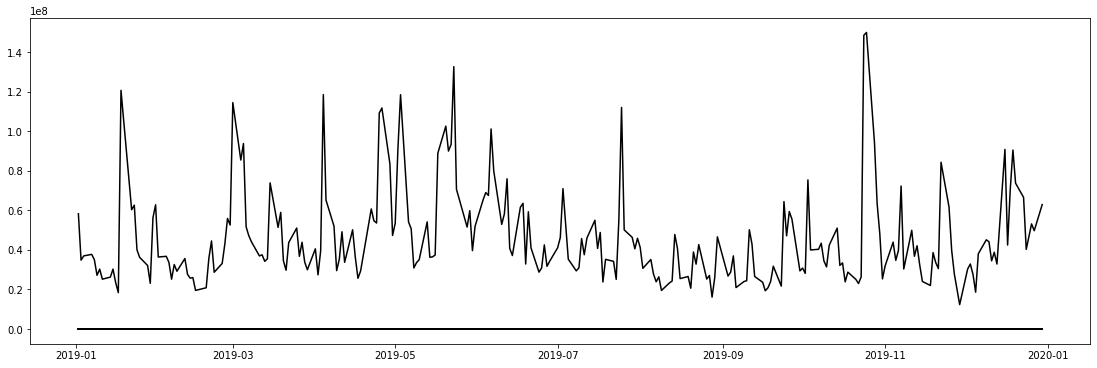

In [ ]:
plt.rcParams["figure.figsize"]=(19,6)
plt.plot(data,color="black")
plt.show()

In [ ]:
data["Open"].isnull().sum()

0

In [ ]:
data=pd.read_csv("Customers_in_a_Shop.csv")
data.head()

,1949-01,114
0,1949-02,120.0
1,1949-03,134.0
2,1949-04,67.0
3,1949-05,123.0
4,1949-06,137.0


In [ ]:
data.columns=["Date","Customers"]
data.head()

,Date,Customers
0,1949-02,120.0
1,1949-03,134.0
2,1949-04,67.0
3,1949-05,123.0
4,1949-06,137.0


In [ ]:
data["Date"]=pd.to_datetime(data["Date"],format="%Y-%m")
data.head()

,Date,Customers
0,1949-02-01,120.0
1,1949-03-01,134.0
2,1949-04-01,67.0
3,1949-05-01,123.0
4,1949-06-01,137.0


In [ ]:
data.set_index("Date",inplace=True)

In [ ]:
data.head()

,Customers
Date,
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
1949-06-01,137.0


In [ ]:
data.isnull().sum()

Customers    4
dtype: int64

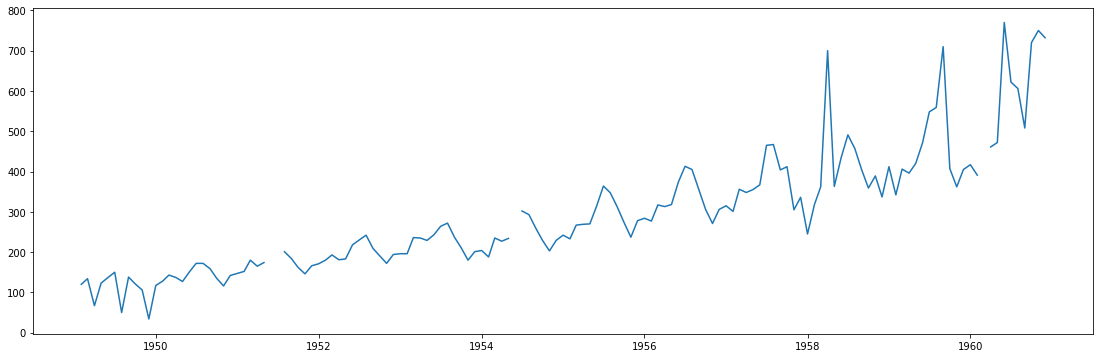

In [ ]:
plt.plot(data["Customers"])

IMPUTAE MISSING VALUES:
## 1. MEAN IMPUTATION
2. Last obervation Carried Forward
3. Linear Interpolation
4. Seasonal Interpolation

In [ ]:
d=data.copy()

In [ ]:
d["Customers"]=d["Customers"].fillna(d["Customers"].mean())
d.isnull().sum()

Customers    0
dtype: int64

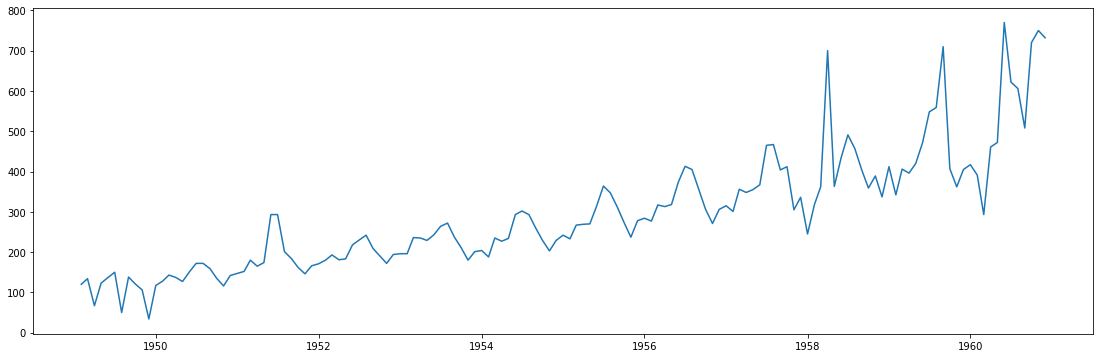

In [ ]:
plt.plot(d["Customers"])

IMPUTAE MISSING VALUES:

1. MEAN IMPUTATION
## 2. Last obervation Carried Forward
3. Linear Interpolation
4. Seasonal Interpolation

In [ ]:
d1=data.copy()

In [ ]:
d1.isnull().sum()

Customers    4
dtype: int64

In [ ]:
d1["Customers"]=d1["Customers"].bfill()
d1.isnull().sum()

Customers    0
dtype: int64

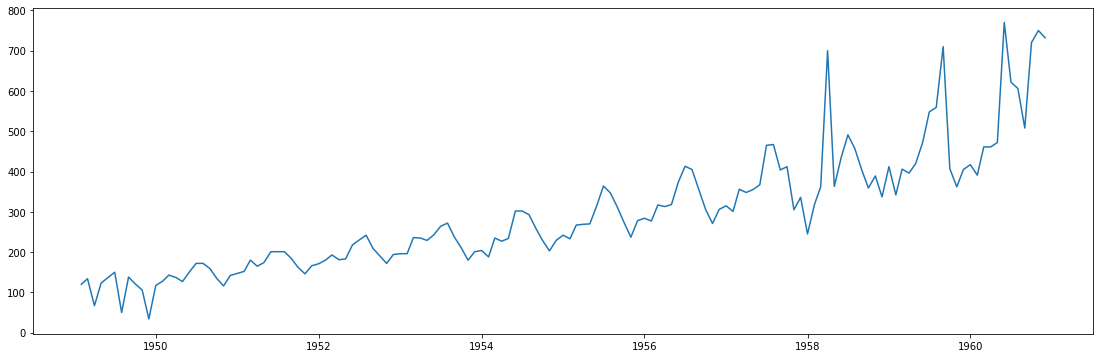

In [ ]:
plt.plot(d1["Customers"])

IMPUTAE MISSING VALUES:

1. MEAN IMPUTATION
2. Last obervation Carried Forward
## 3. Linear Interpolation
4. Seasonal Interpolation

In [ ]:
d2=data.copy()

In [ ]:
d2.isnull().sum()

Customers    4
dtype: int64

In [ ]:
d2["Customers"]=d2["Customers"].interpolate(method="linear")
d2.isnull().sum()

Customers    0
dtype: int64

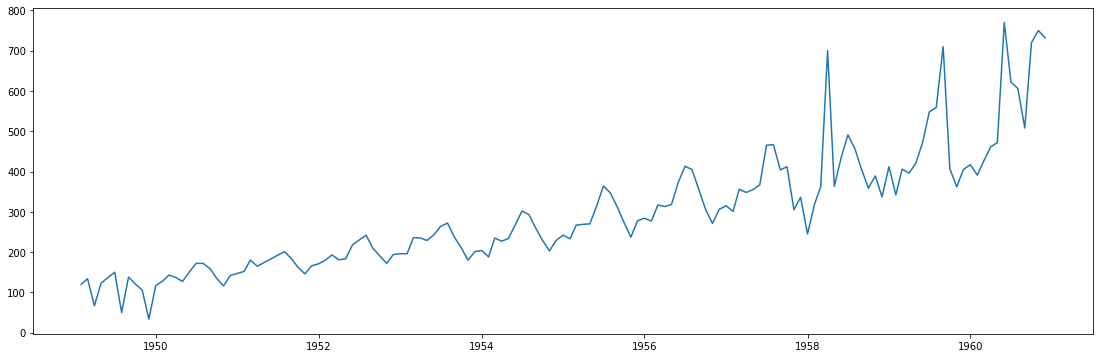

In [ ]:
plt.plot(d2["Customers"])

IMPUTAE MISSING VALUES:

1. MEAN IMPUTATION
2. Last obervation Carried Forward
3. Linear Interpolation
## 4. Seasonal Interpolation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


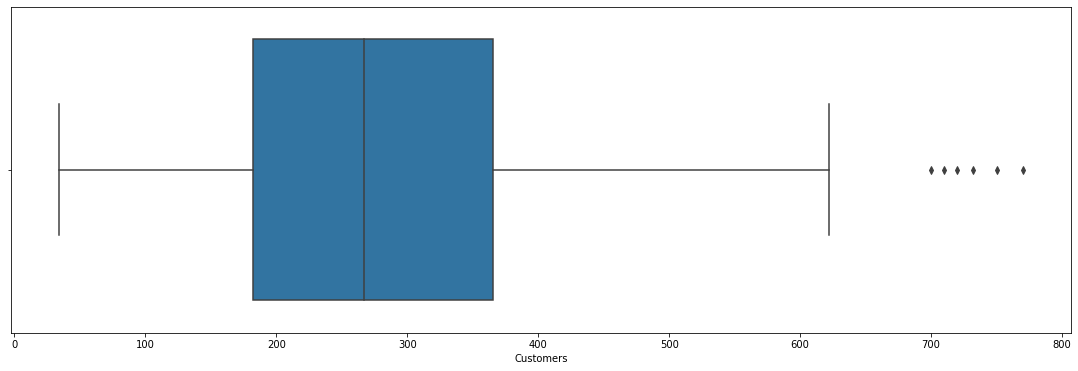

In [ ]:
sns.boxplot(d2["Customers"])

In [ ]:
d2[d2["Customers"]>=700]=622

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


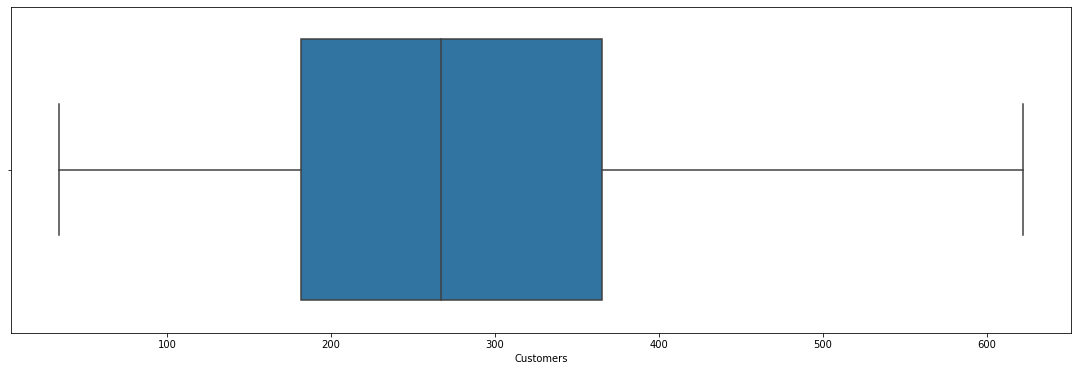

In [ ]:
sns.boxplot(d2["Customers"])

In [ ]:
decomposition=sm.tsa.seasonal_decompose(d2["Customers"],model='additive')


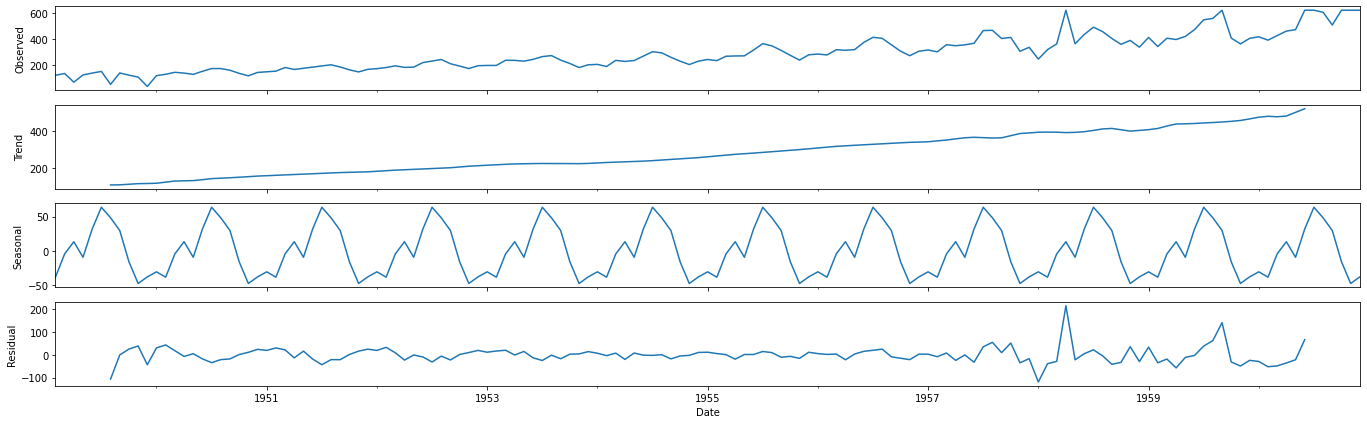

In [ ]:
decomposition.plot()
plt.show()

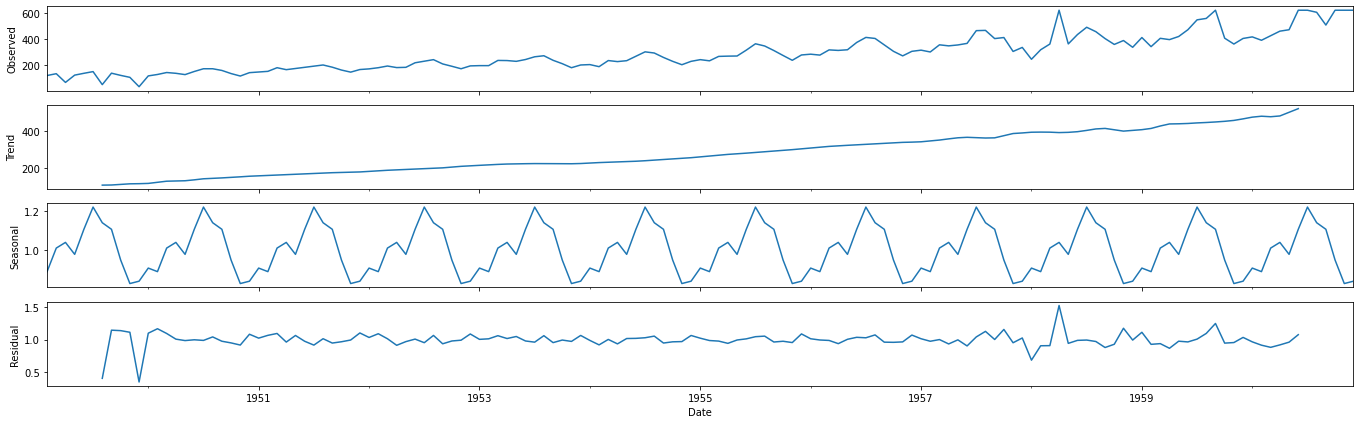

In [ ]:
decomposition=sm.tsa.seasonal_decompose(d2["Customers"],model='multiplicative')
decomposition.plot()
plt.show()

In [ ]:
train=d2.iloc[:100,:]
test=d2.iloc[100:,:]

In [ ]:
train.head()

,Customers
Date,
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
1949-06-01,137.0


In [ ]:
Data=pd.read_csv("daily-total-female-births-CA.csv")
Data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


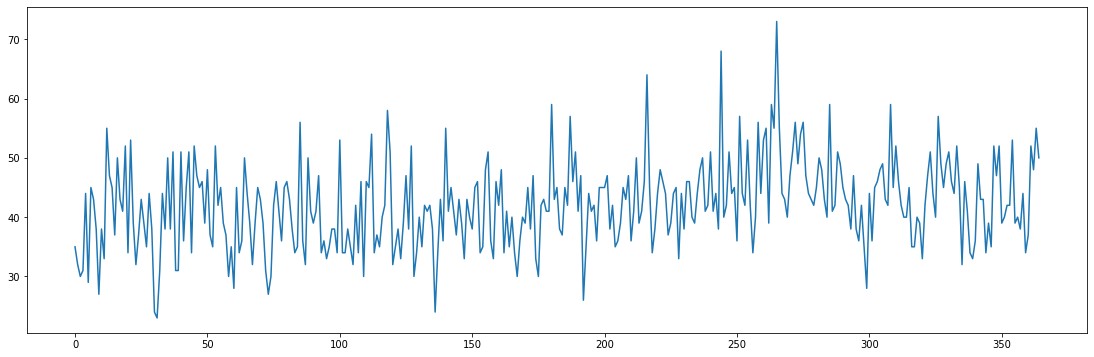

In [ ]:
plt.plot(Data["births"])

In [ ]:
data=pd.read_csv("daily-total-female-births-CA.csv",header=0,parse_dates=[0])
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
data["date"].dtype

dtype('<M8[ns]')

In [ ]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


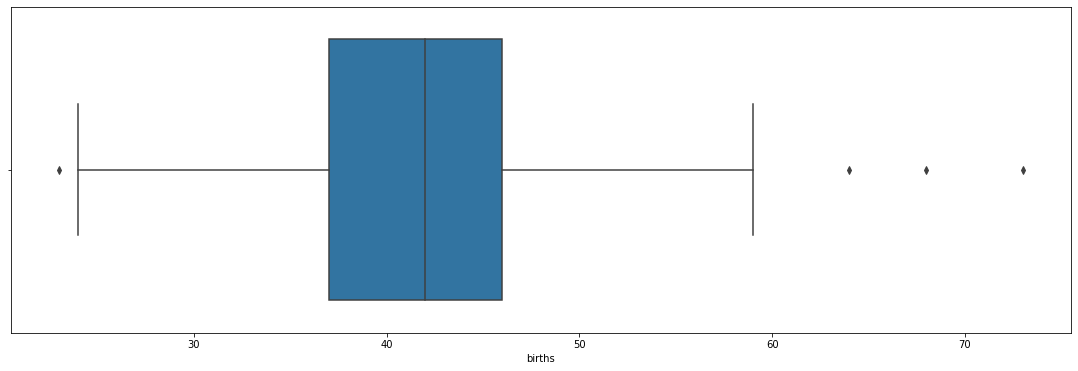

In [ ]:
sns.boxplot(data["births"])

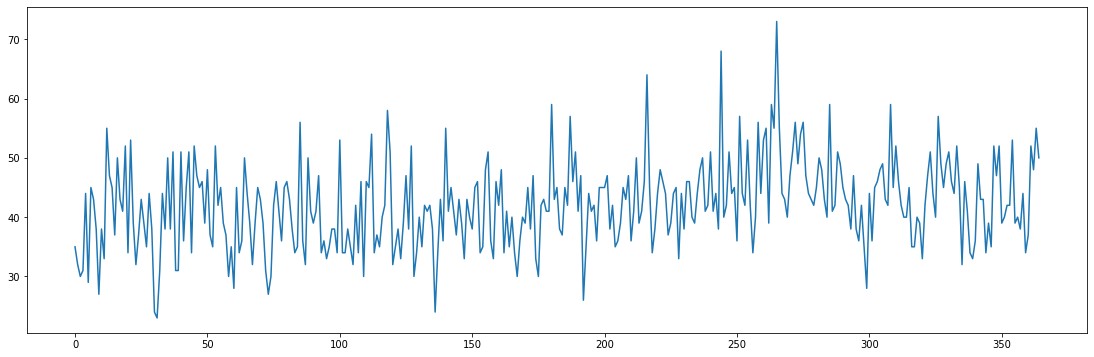

In [ ]:
plt.plot(Data["births"])

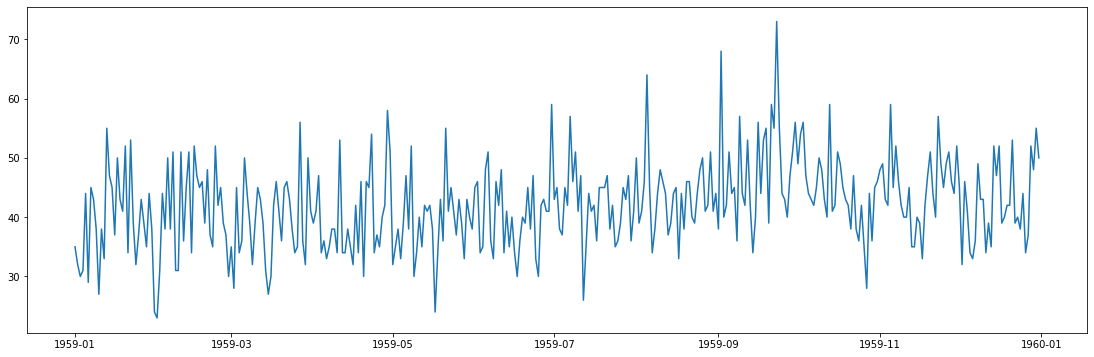

In [ ]:
d=data.copy()
d.index=d["date"]
plt.plot(d["births"])

In [ ]:
d.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


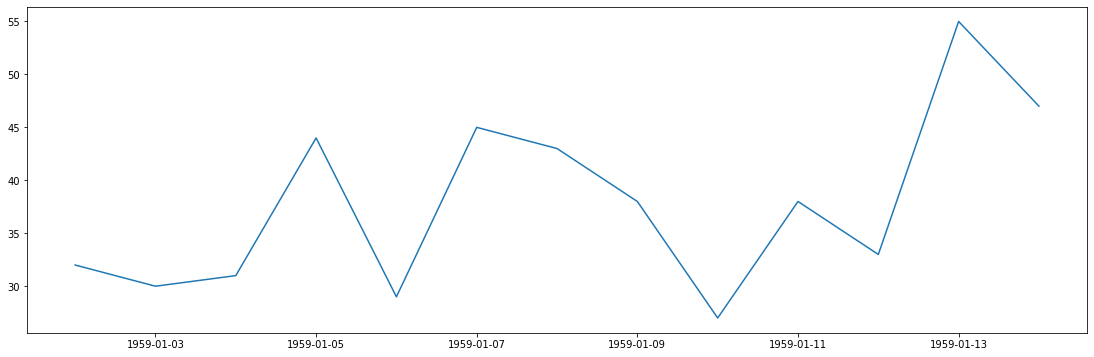

In [ ]:
d1=d[(d["date"]>"1959-01-01") & (d["date"]<"1959-01-15")]
plt.plot(d1["births"])

In [ ]:
d1

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


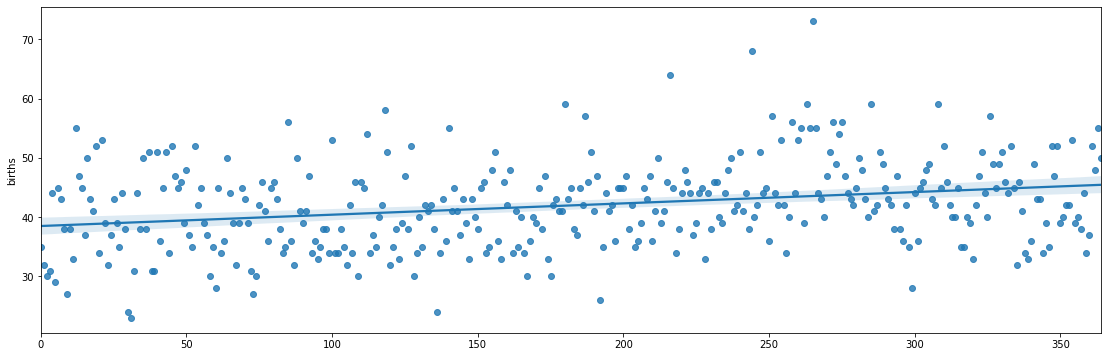

In [ ]:
sns.regplot(x=data.index.values,y=data["births"])

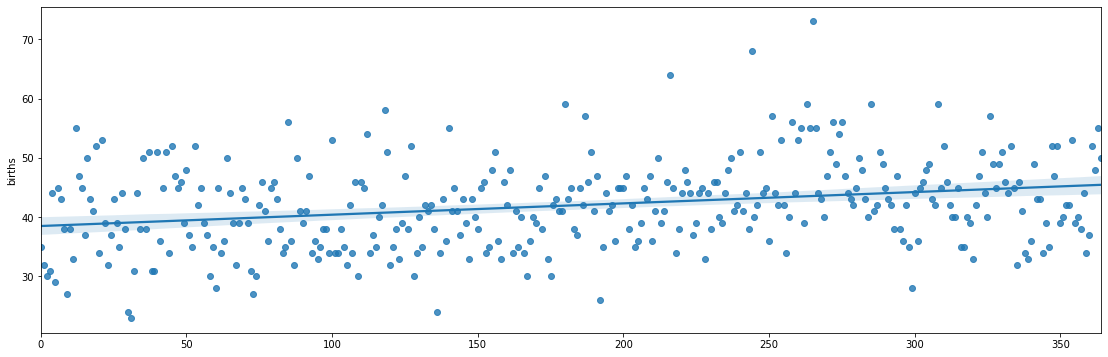

In [ ]:
sns.regplot(x=data.index.values,y=d["births"])

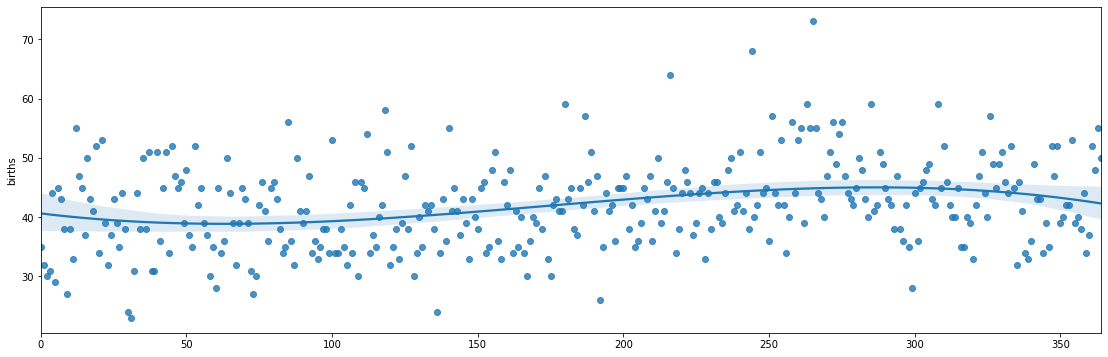

In [ ]:
sns.regplot(x=data.index.values,y=d["births"],order=3)

In [ ]:
data["year"]=data["date"].dt.year
data.head()

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959
2,1959-01-03,30,1959
3,1959-01-04,31,1959
4,1959-01-05,44,1959


In [ ]:
data.groupby("year")["births"].mean()

year
1959    41.980822
Name: births, dtype: float64

In [ ]:
data["year"].value_counts()

1959    365
Name: year, dtype: int64

In [ ]:
data["lag"]=data["births"].shift(1)

In [ ]:
data.head()

,date,births,year,lag
0,1959-01-01,35,1959,NaN
1,1959-01-02,32,1959,35.0
2,1959-01-03,30,1959,32.0
3,1959-01-04,31,1959,30.0
4,1959-01-05,44,1959,31.0


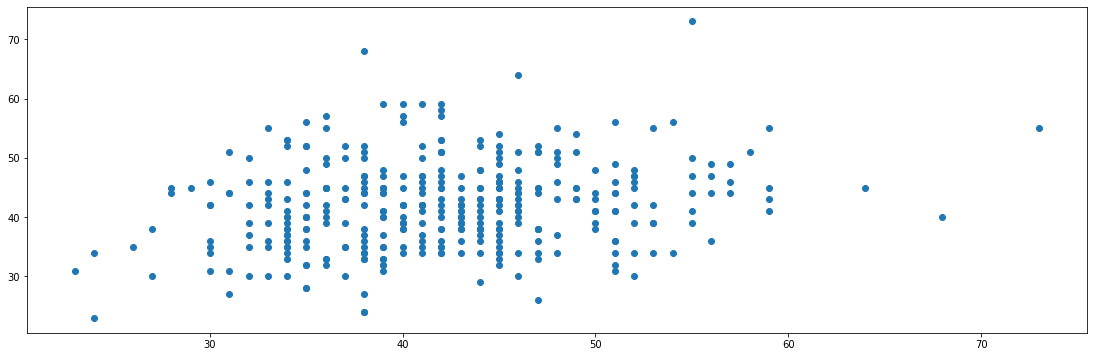

In [ ]:
plt.scatter(data.lag,data.births)

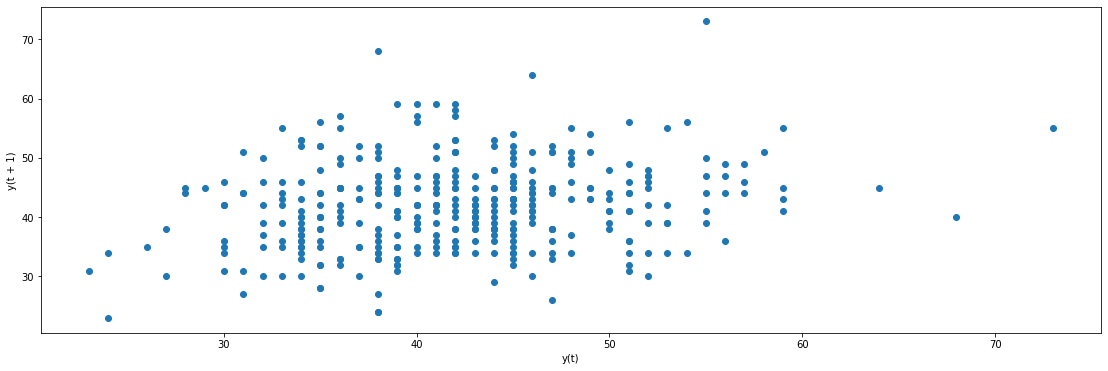

In [ ]:
lag_plot(data["births"])

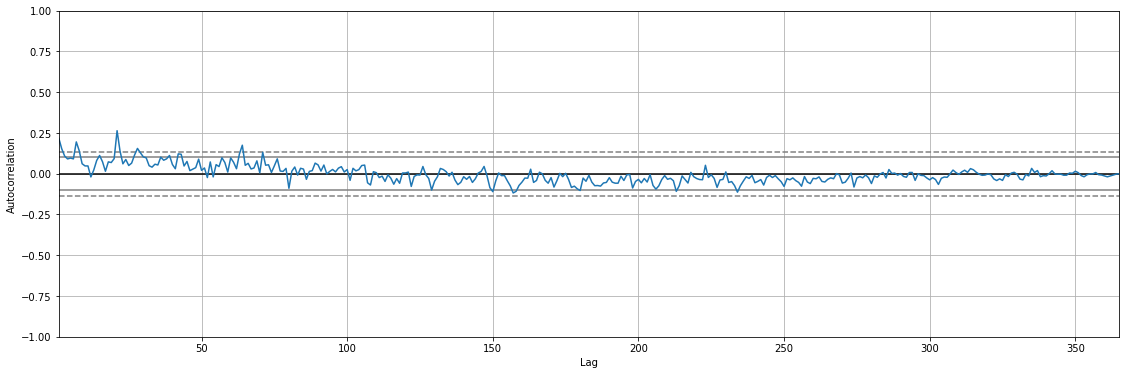

In [ ]:
autocorrelation_plot(data["births"])

In [ ]:
data.head()

,date,births,year,lag
0,1959-01-01,35,1959,NaN
1,1959-01-02,32,1959,35.0
2,1959-01-03,30,1959,32.0
3,1959-01-04,31,1959,30.0
4,1959-01-05,44,1959,31.0


In [ ]:
data["month"]=data["date"].dt.month
data["day"]=data["date"].dt.day
data.drop(columns="lag",inplace=True)

In [ ]:
data.head()

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


In [ ]:
data["lag1"]=data["births"].shift(1)
data["lag2"]=data["births"].shift(165)
data.head()

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [ ]:
data["roll_mean"]=data["births"].rolling(window=2).mean()
data["roll_max"]=data["births"].rolling(window=2).max()
data.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,32.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,31.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


In [ ]:
data["expand_max"]=data["births"].expanding().max()
data.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,32.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,31.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


In [ ]:
quaterly_births_data=data.resample("Q",on="date").mean()
quaterly_births_data

,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
date,,,,,,,,,
1959-03-31,39.766667,1959.0,2.00000,15.533333,39.752809,NaN,39.786517,43.966292,53.255556
1959-06-30,39.725275,1959.0,5.00000,15.670330,39.527473,38.062500,39.626374,43.186813,57.395604
1959-09-30,44.532609,1959.0,7.98913,15.836957,44.565217,39.641304,44.548913,48.358696,63.793478
1959-12-31,43.826087,1959.0,11.00000,15.836957,43.891304,40.695652,43.858696,46.869565,73.000000


In [ ]:
weekly_births_data=data.resample("W",on="date").mean()
weekly_births_data

,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
date,,,,,,,,,
1959-01-04,32.000000,1959.0,1.000000,2.500000,32.333333,NaN,31.666667,32.666667,35.000000
1959-01-11,37.714286,1959.0,1.000000,8.000000,36.714286,NaN,37.214286,42.428571,44.714286
1959-01-18,44.285714,1959.0,1.000000,15.000000,43.571429,NaN,43.928571,48.571429,53.571429
1959-01-25,41.142857,1959.0,1.000000,22.000000,42.000000,NaN,41.571429,47.000000,55.000000
1959-02-01,35.142857,1959.0,1.142857,24.571429,37.142857,NaN,36.142857,39.285714,55.000000
1959-02-08,40.428571,1959.0,2.000000,5.000000,39.285714,NaN,39.857143,45.857143,55.000000
1959-02-15,42.857143,1959.0,2.000000,12.000000,39.857143,NaN,41.357143,47.428571,55.000000
1959-02-22,42.428571,1959.0,2.000000,19.000000,44.857143,NaN,43.642857,46.285714,55.000000
1959-03-01,40.000000,1959.0,2.142857,22.000000,40.000000,NaN,40.000000,43.571429,55.000000


In [ ]:
weekly_births_data=data.resample("W",on="date").mean()
weekly_births_data

,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
date,,,,,,,,,
1959-01-04,32.000000,1959.0,1.000000,2.500000,32.333333,NaN,31.666667,32.666667,35.000000
1959-01-11,37.714286,1959.0,1.000000,8.000000,36.714286,NaN,37.214286,42.428571,44.714286
1959-01-18,44.285714,1959.0,1.000000,15.000000,43.571429,NaN,43.928571,48.571429,53.571429
1959-01-25,41.142857,1959.0,1.000000,22.000000,42.000000,NaN,41.571429,47.000000,55.000000
1959-02-01,35.142857,1959.0,1.142857,24.571429,37.142857,NaN,36.142857,39.285714,55.000000
1959-02-08,40.428571,1959.0,2.000000,5.000000,39.285714,NaN,39.857143,45.857143,55.000000
1959-02-15,42.857143,1959.0,2.000000,12.000000,39.857143,NaN,41.357143,47.428571,55.000000
1959-02-22,42.428571,1959.0,2.000000,19.000000,44.857143,NaN,43.642857,46.285714,55.000000
1959-03-01,40.000000,1959.0,2.142857,22.000000,40.000000,NaN,40.000000,43.571429,55.000000


In [ ]:
daily_data=d.resample("d",on="date").mean()
daily_data

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [ ]:
data.head()

,date,births,year,month,day,lag1,lag2,roll_mean,roll_max,expand_max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,35.0,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,32.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,31.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


In [ ]:
d.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [ ]:
d["lag1"]=d["births"].shift(1)
d.head()

,date,births,lag1
date,,,
1959-01-01,1959-01-01,35,NaN
1959-01-02,1959-01-02,32,35.0
1959-01-03,1959-01-03,30,32.0
1959-01-04,1959-01-04,31,30.0
1959-01-05,1959-01-05,44,31.0


In [ ]:
d["diff_terms"]=d["births"].diff(periods=1)
d.head()

,date,births,lag1,diff_terms
date,,,,
1959-01-01,1959-01-01,35,NaN,NaN
1959-01-02,1959-01-02,32,35.0,-3.0
1959-01-03,1959-01-03,30,32.0,-2.0
1959-01-04,1959-01-04,31,30.0,1.0
1959-01-05,1959-01-05,44,31.0,13.0


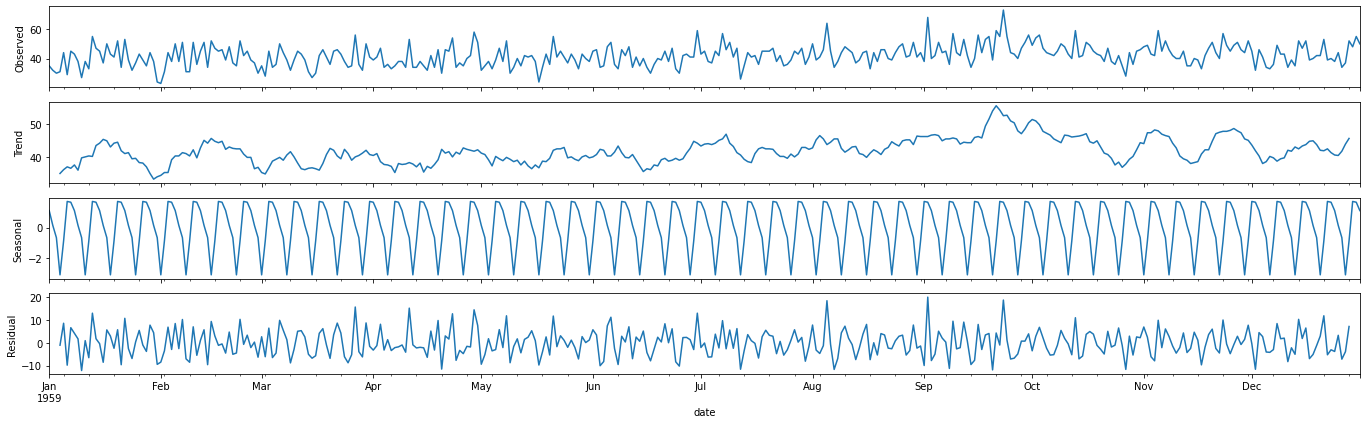

In [ ]:
decomp=sm.tsa.seasonal_decompose(d["births"],model="additive")
decomp.plot()
plt.show()

In [ ]:
train

,Customers
Date,
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
1949-06-01,137.0
...,...
1957-01-01,315.0
1957-02-01,301.0
1957-03-01,356.0


In [ ]:
test

,Customers
Date,
1957-06-01,367.0
1957-07-01,465.0
1957-08-01,467.0
1957-09-01,404.0
1957-10-01,412.0
1957-11-01,305.0
1957-12-01,336.0
1958-01-01,245.0
1958-02-01,318.0


In [ ]:
d.head()

,date,births,lag1,diff_terms
date,,,,
1959-01-01,1959-01-01,35,NaN,NaN
1959-01-02,1959-01-02,32,35.0,-3.0
1959-01-03,1959-01-03,30,32.0,-2.0
1959-01-04,1959-01-04,31,30.0,1.0
1959-01-05,1959-01-05,44,31.0,13.0


In [ ]:
D=d.drop(columns=["lag1","diff_terms"])
D.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [ ]:
D["t"]=D["births"].shift(1)
D.head()

,date,births,t
date,,,
1959-01-01,1959-01-01,35,NaN
1959-01-02,1959-01-02,32,35.0
1959-01-03,1959-01-03,30,32.0
1959-01-04,1959-01-04,31,30.0
1959-01-05,1959-01-05,44,31.0


In [ ]:
train=D.iloc[1:D.shape[0]-7,:]
test=D.iloc[D.shape[0]-7:,:]
train[:5]

,date,births,t
date,,,
1959-01-02,1959-01-02,32,35.0
1959-01-03,1959-01-03,30,32.0
1959-01-04,1959-01-04,31,30.0
1959-01-05,1959-01-05,44,31.0
1959-01-06,1959-01-06,29,44.0


In [ ]:
x_train,y_train=train["t"],train["births"]
x_test,y_test=test["t"],test["births"]

In [ ]:
prediction=x_test.copy()

In [ ]:
print(prediction)
print(y_test)

date
1959-12-25    38.0
1959-12-26    44.0
1959-12-27    34.0
1959-12-28    37.0
1959-12-29    52.0
1959-12-30    48.0
1959-12-31    55.0
Name: t, dtype: float64
date
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64


In [ ]:
mean_squared_error(y_test,prediction)

65.71428571428571

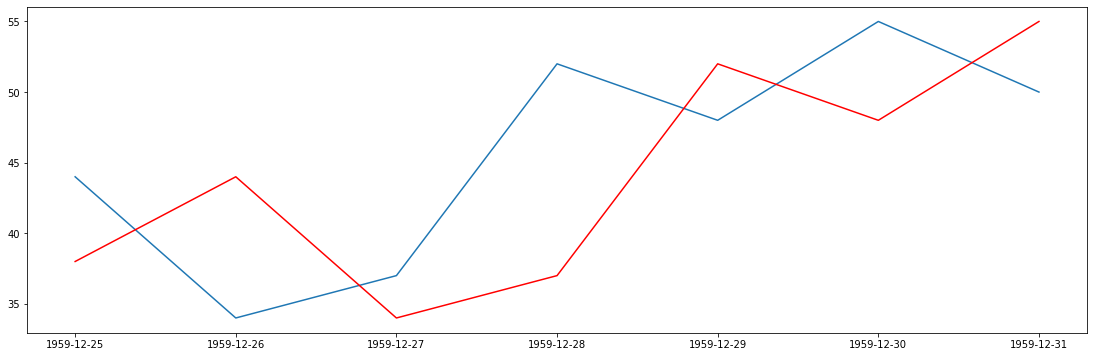

In [ ]:
plt.plot(y_test)
plt.plot(prediction,color="red")

## Auto Regression

In [ ]:
train[:5]

,date,births,t
date,,,
1959-01-02,1959-01-02,32,35.0
1959-01-03,1959-01-03,30,32.0
1959-01-04,1959-01-04,31,30.0
1959-01-05,1959-01-05,44,31.0
1959-01-06,1959-01-06,29,44.0


In [ ]:
test.shape

(7, 3)

In [ ]:
train,test=D.births[1:D.shape[0]-7],D.births[D.shape[0]-7:]
model=AR(train)
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.k_ar

16

In [ ]:
model_fit.params

const         17.311891
L1.births      0.155228
L2.births      0.075735
L3.births      0.051489
L4.births      0.018302
L5.births      0.063028
L6.births      0.002575
L7.births      0.158568
L8.births      0.046033
L9.births     -0.037594
L10.births    -0.010462
L11.births     0.036639
L12.births    -0.078838
L13.births    -0.011259
L14.births     0.027957
L15.births     0.061239
L16.births     0.029511
dtype: float64

In [ ]:
predict=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
predict

1959-12-25    41.224461
1959-12-26    40.971893
1959-12-27    40.743373
1959-12-28    42.067430
1959-12-29    42.232141
1959-12-30    42.116348
1959-12-31    41.933617
Freq: D, dtype: float64

In [ ]:
mean_squared_error(y_test,predict)

61.90041747753069

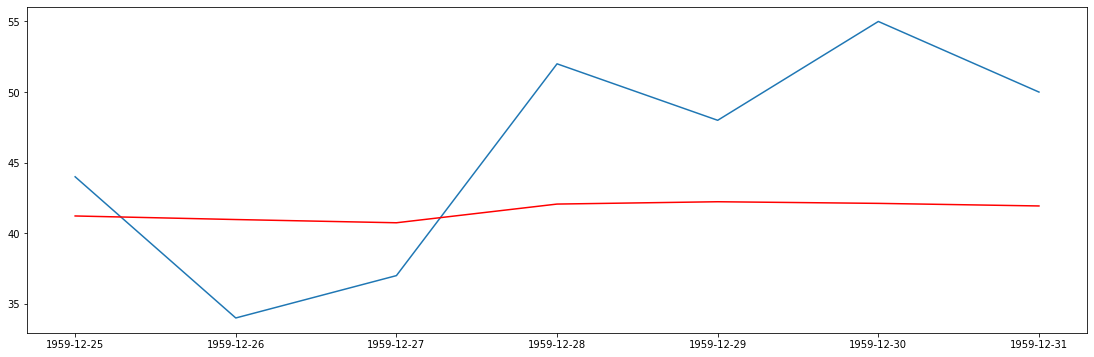

In [ ]:
plt.plot(y_test)
plt.plot(predict,color="red")

In [ ]:
d.head()

,date,births,lag1,diff_terms
date,,,,
1959-01-01,1959-01-01,35,NaN,NaN
1959-01-02,1959-01-02,32,35.0,-3.0
1959-01-03,1959-01-03,30,32.0,-2.0
1959-01-04,1959-01-04,31,30.0,1.0
1959-01-05,1959-01-05,44,31.0,13.0


In [ ]:
d.drop(columns=["lag1","diff_terms"],inplace=True)

In [ ]:
d.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [ ]:
d["lag1"]=d["births"].shift(1)
d.head()

,date,births,lag1
date,,,
1959-01-01,1959-01-01,35,NaN
1959-01-02,1959-01-02,32,35.0
1959-01-03,1959-01-03,30,32.0
1959-01-04,1959-01-04,31,30.0
1959-01-05,1959-01-05,44,31.0


In [ ]:
d["diff_lag"]=d["births"].diff(periods=1)
d.head()

,date,births,lag1,diff_lag
date,,,,
1959-01-01,1959-01-01,35,NaN,NaN
1959-01-02,1959-01-02,32,35.0,-3.0
1959-01-03,1959-01-03,30,32.0,-2.0
1959-01-04,1959-01-04,31,30.0,1.0
1959-01-05,1959-01-05,44,31.0,13.0


In [ ]:
train,test=d["diff_lag"][1:d.shape[0]-7],d["diff_lag"][d.shape[0]-7:]
train

date
1959-01-02    -3.0
1959-01-03    -2.0
1959-01-04     1.0
1959-01-05    13.0
1959-01-06   -15.0
              ... 
1959-12-20     0.0
1959-12-21    11.0
1959-12-22   -14.0
1959-12-23     1.0
1959-12-24    -2.0
Name: diff_lag, Length: 357, dtype: float64

In [ ]:
test

date
1959-12-25     6.0
1959-12-26   -10.0
1959-12-27     3.0
1959-12-28    15.0
1959-12-29    -4.0
1959-12-30     7.0
1959-12-31    -5.0
Name: diff_lag, dtype: float64

In [ ]:
model=AR(train)
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.k_ar

16

In [ ]:
model_fit.params

const           0.001250
L1.diff_lag    -0.810683
L2.diff_lag    -0.704974
L3.diff_lag    -0.624713
L4.diff_lag    -0.578991
L5.diff_lag    -0.489787
L6.diff_lag    -0.464495
L7.diff_lag    -0.283210
L8.diff_lag    -0.221452
L9.diff_lag    -0.243785
L10.diff_lag   -0.233926
L11.diff_lag   -0.174241
L12.diff_lag   -0.231226
L13.diff_lag   -0.216173
L14.diff_lag   -0.160509
L15.diff_lag   -0.070622
L16.diff_lag   -0.010922
dtype: float64

In [ ]:
results=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
results

1959-12-25    3.304161
1959-12-26   -0.324119
1959-12-27   -0.295776
1959-12-28    1.428789
1959-12-29    0.313558
1959-12-30    0.153807
1959-12-31   -0.147579
Freq: D, dtype: float64

In [ ]:
predictions=d["lag1"][d.shape[0]-7:]+results

In [ ]:
predictions

date
1959-12-25    41.304161
1959-12-26    43.675881
1959-12-27    33.704224
1959-12-28    38.428789
1959-12-29    52.313558
1959-12-30    48.153807
1959-12-31    54.852421
dtype: float64

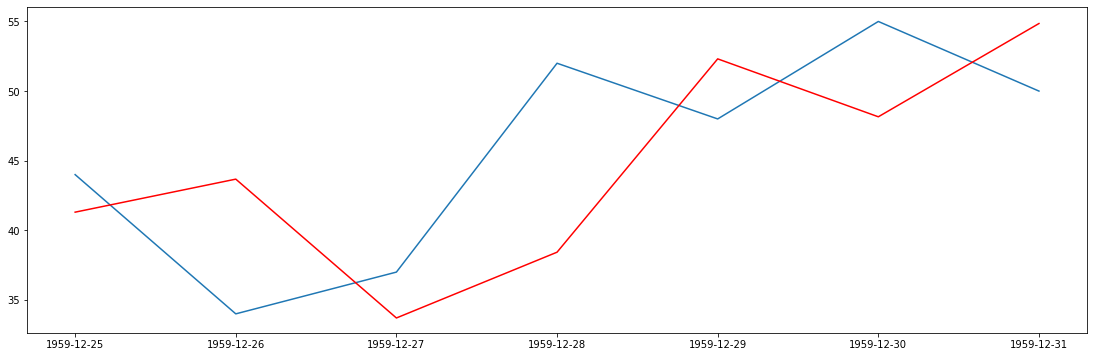

In [ ]:
plt.plot(y_test)
plt.plot(predictions,color="red")

In [ ]:
mean_squared_error(y_test,predictions)

54.99332114846869

In [ ]:
y_test

date
1959-12-25    44
1959-12-26    34
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, dtype: int64

In [ ]:
data=pd.read_csv("shampoo.csv")
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


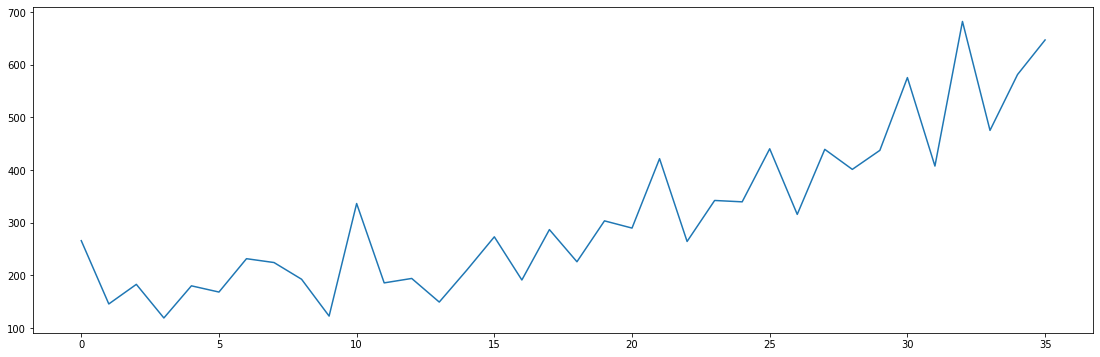

In [ ]:
data["Sales"].plot()

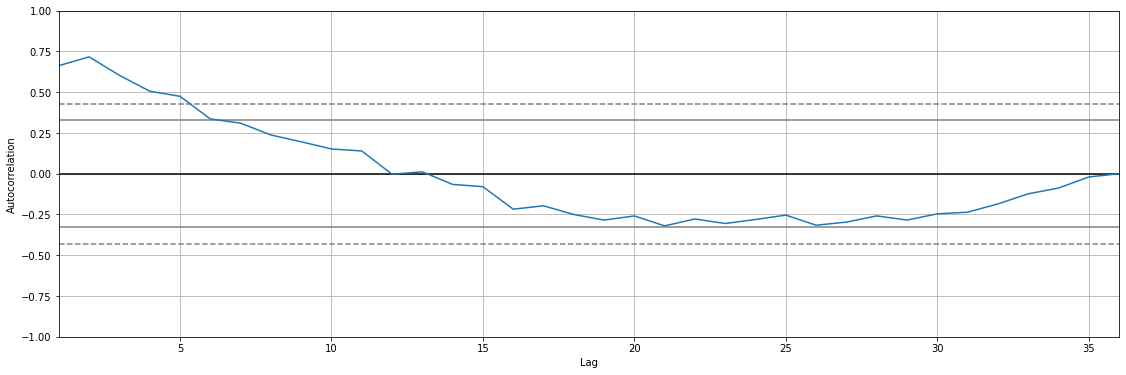

In [ ]:
autocorrelation_plot(data["Sales"])

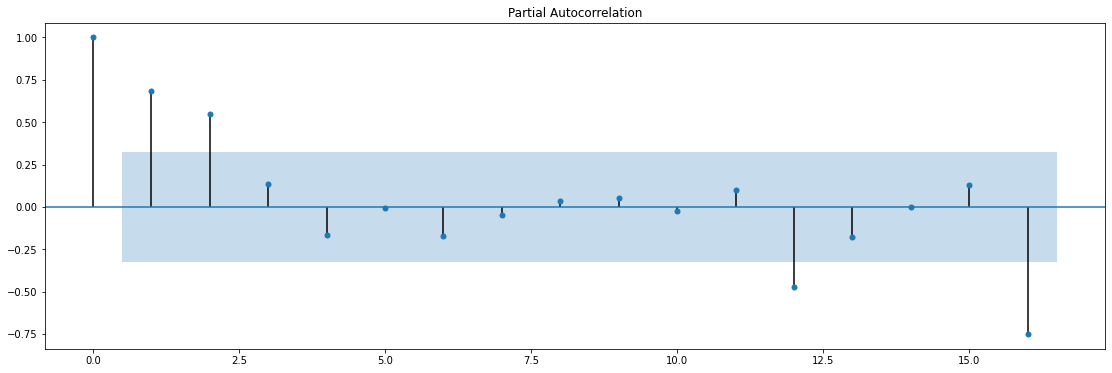

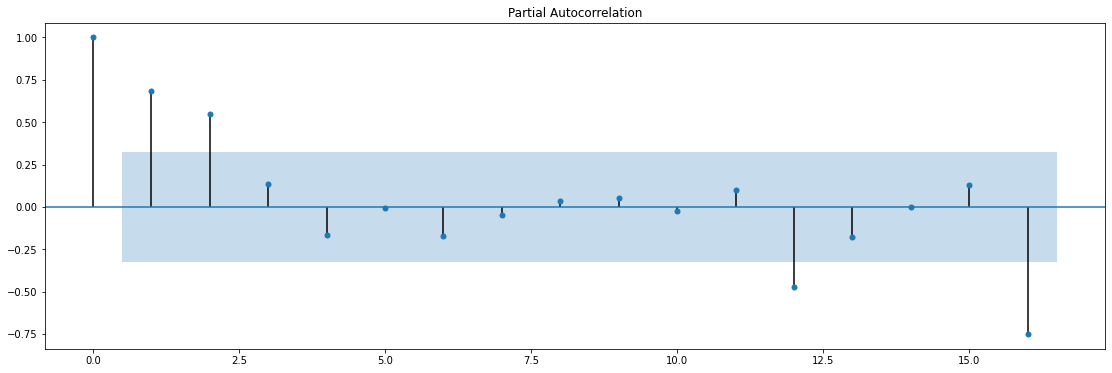

In [ ]:
plot_pacf(data["Sales"])

In [ ]:
model=ARIMA(data["Sales"],order=(2,2,3))
fit=model.fit()

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(2, 2, 3)   Log Likelihood                -187.842
Method:                       css-mle   S.D. of innovations             49.767
Date:                Sat, 07 Aug 2021   AIC                            389.684
Time:                        10:57:04   BIC                            400.368
Sample:                             2   HQIC                           393.327
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9216      0.101      9.091      0.000       0.723       1.120
ar.L1.D2.Sales    -1.4817      0.138    -10.704      0.000      -1.753      -1.210
ar.L2.D2.Sales    -0.5607      0.139     -4.030      0.000      -0.833      -0.288
ma.L1.D2.Sales    -0.9853      0.147     -6.694      0.000      -1.274      -0.697
ma.L2.D2.Sales    -0.9872      0.155     -6.360      0.000      -1.291      -0.683
ma.L3.D2.Sales     0.9981      0.147      6.795      0.000       0.710       1.286
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3212           -0.1944j            1.3354           -0.4767
AR.2           -1.3212           +0.1944j            1.3354            0.4767
MA.1           -1.0000           -0.0000j            1.0000           -0.5000
MA.2            0.9945           -0.1132j            1.0010           -0.0180
MA.3            0.9945           +0.1132j            1.0010            0.0180
-----------------------------------------------------------------------------
"""

In [ ]:
residual=fit.resid

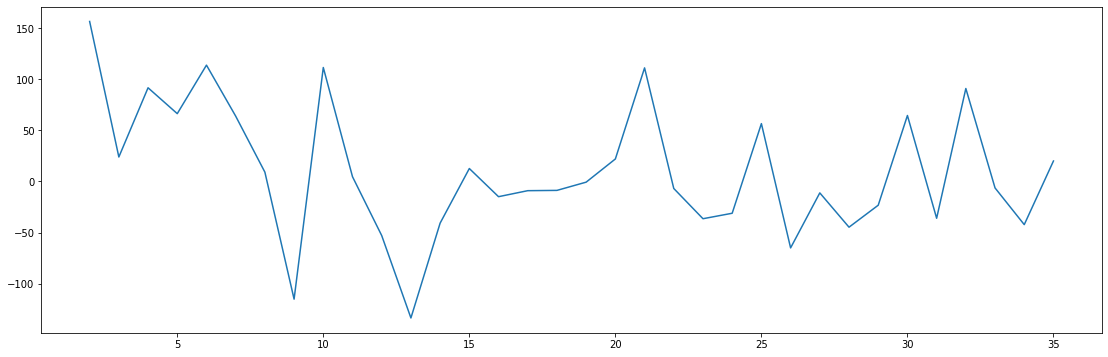

In [ ]:
residual.plot()

In [ ]:
residual.describe()

count     34.000000
mean       9.954765
std       65.408590
min     -133.520955
25%      -34.808814
50%       -3.559815
75%       61.997123
max      156.378365
dtype: float64

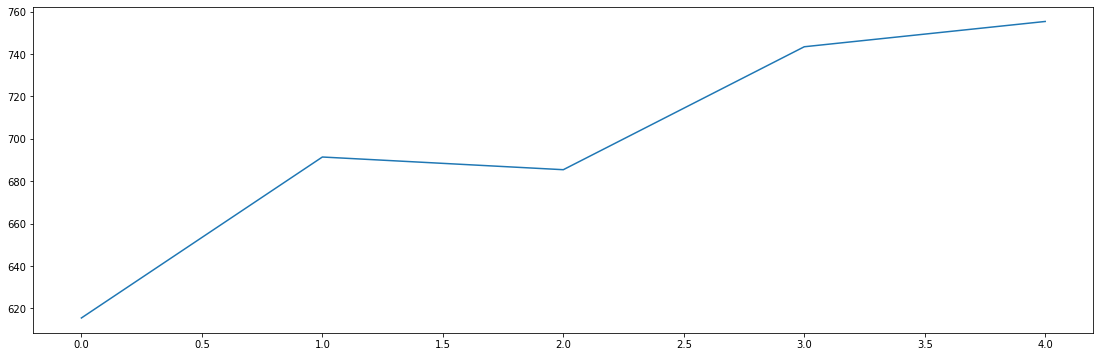

In [ ]:
pd.Series(fit.forecast(5)[0]).plot()

In [ ]:
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
size=int(data.shape[0]*0.7)

In [ ]:
train,test=data["Sales"][:size],data["Sales"][size:]

In [ ]:
train.shape

(25,)

In [ ]:
test.shape

(11,)

In [ ]:
TRAIN=train
predict=[]
for i in test:
  model=ARIMA(TRAIN,order=(3,1,0))
  fit=model.fit()
  y=fit.forecast()
  print(y[0][0])
  predict.append(y[0][0])
  TRAIN=np.append(TRAIN,i)
  TRAIN=pd.Series(TRAIN)


390.18705821049764
334.19915249778376
393.4322564724504
369.9289547309859
451.5105803053603
388.95732296591467
472.2713060713486
507.25781620228776
471.66102486293687
634.2593913059318
539.7862649047668


In [ ]:
predict

[390.18705821049764,
 334.19915249778376,
 393.4322564724504,
 369.9289547309859,
 451.5105803053603,
 388.95732296591467,
 472.2713060713486,
 507.25781620228776,
 471.66102486293687,
 634.2593913059318,
 539.7862649047668]

In [ ]:
mean_squared_error(test.values,predict)

8177.269986857459

In [ ]:
data=pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",parse_dates=[0])
data.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [ ]:
data.index=data["Month"]
data.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


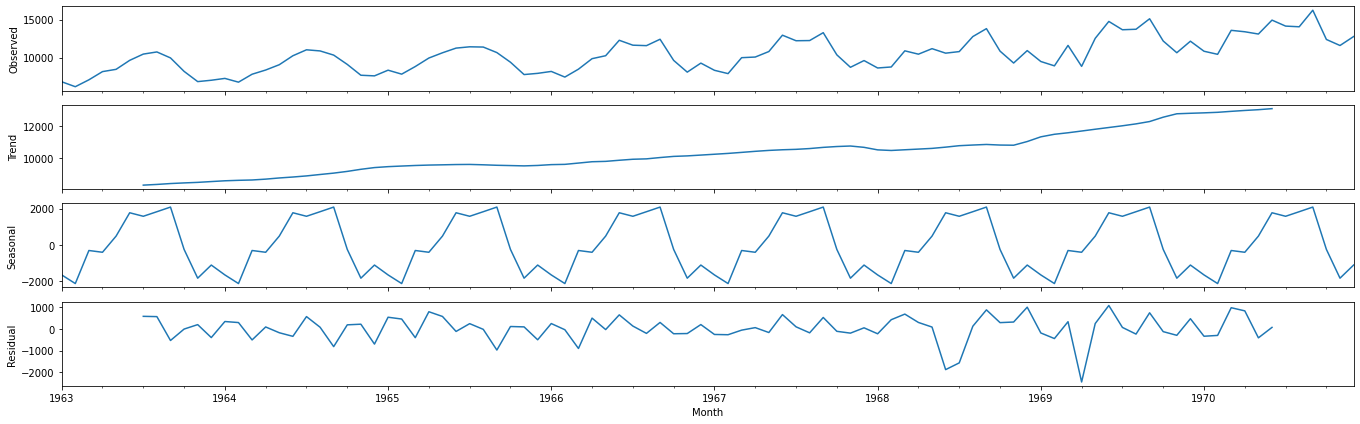

In [ ]:
decomp=sm.tsa.seasonal_decompose(data["MilesMM"],model="additive")
decomp.plot()
plt.show()

In [ ]:
model=SARIMAX(data["MilesMM"],order=(5,1,3),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


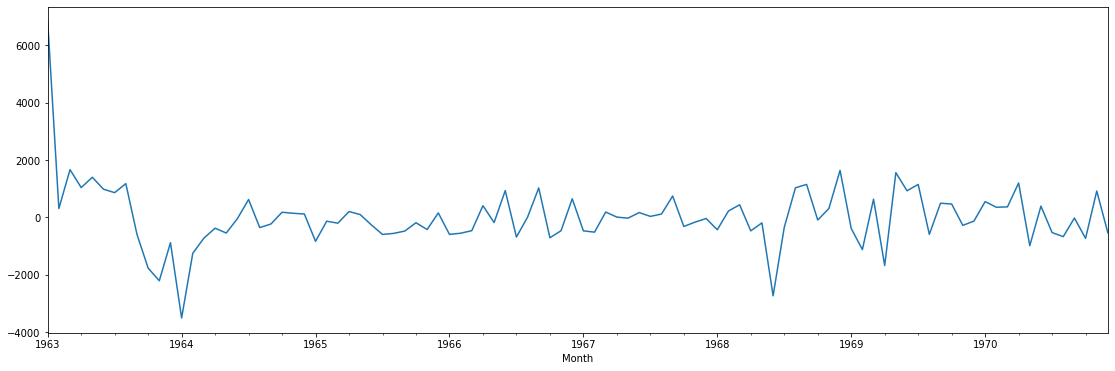

In [ ]:
fit.resid.plot()

In [ ]:
pred=fit.forecast(12)

In [ ]:
pred

1971-01-01    11474.961639
1971-02-01    11153.247655
1971-03-01    13668.288376
1971-04-01    12645.968371
1971-05-01    14338.976052
1971-06-01    15785.415314
1971-07-01    14978.179317
1971-08-01    15361.997494
1971-09-01    16961.899430
1971-10-01    13681.939420
1971-11-01    12426.429290
1971-12-01    13729.125998
Freq: MS, dtype: float64

In [ ]:
yhat=fit.predict()

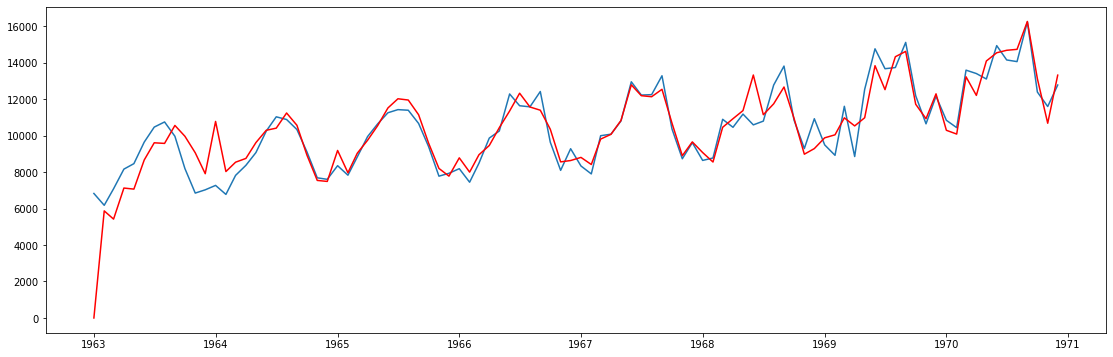

In [ ]:
plt.plot(data["MilesMM"])
plt.plot(yhat,color="red")